In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

In [15]:
df = pd.read_csv("FuelConsumptionCo2.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


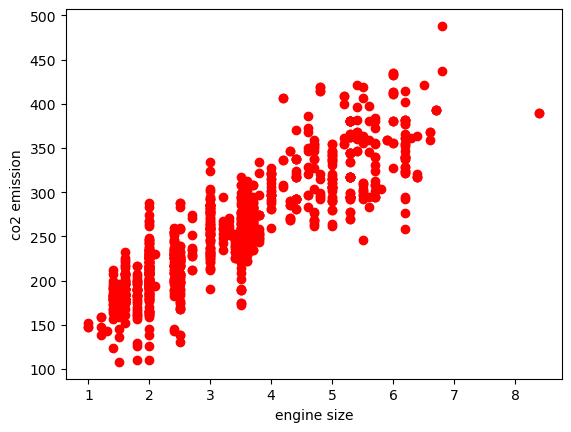

In [17]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='red')
plt.xlabel('engine size')
plt.ylabel('co2 emission')
plt.show()

In [57]:
msk = np.random.rand(len(cdf)) < .8
train = cdf[msk]
test = cdf[~msk]

In [61]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(x, y)
print('Coefficients: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Coefficients:  [[ 11.05691429   8.50572699 -12.24511574  -9.10597682  30.2592406 ]]
Intercept:  [68.26146479]


In [67]:
y_hat = reg.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print('Residual sum of squares: %.2f' % np.mean((y_hat - y) ** 2))

print("Variance score: %.2f" % reg.score(x, y))

Residual sum of squares: 554.92
Variance score: 0.87


C:\Users\erfan\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
